In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://query.data.world/s/xdx6vyb5oqme4hrsudi22npyjbb3xo', encoding = "ISO-8859-1")

# EDA
* Checking data ypes of all columns to make sure they are numeric/float appropriately
* distributions / boxplots to check if there are any anmolies such as degenerate distributions, invalid data and outliers
    * Here we can see MedianAge range goes beyond 100. Checking this column for valid ages and correcting or dropping the reocrds
    * Are there particular predictors that are more likely to be missing?
        * PctSomeCol18_24 - Percent of county residents ages 18-24 highest education attained: bachelor's degree (b) - 75% data missing
        * PctPrivateCoverageAlone -  Percent of county residents with private health coverage alone (no public assistance) (b) - 5% data missing
        * PctEmployed16_Over - Percent of county residents ages 16 and over employed (b) - 15% data missing      

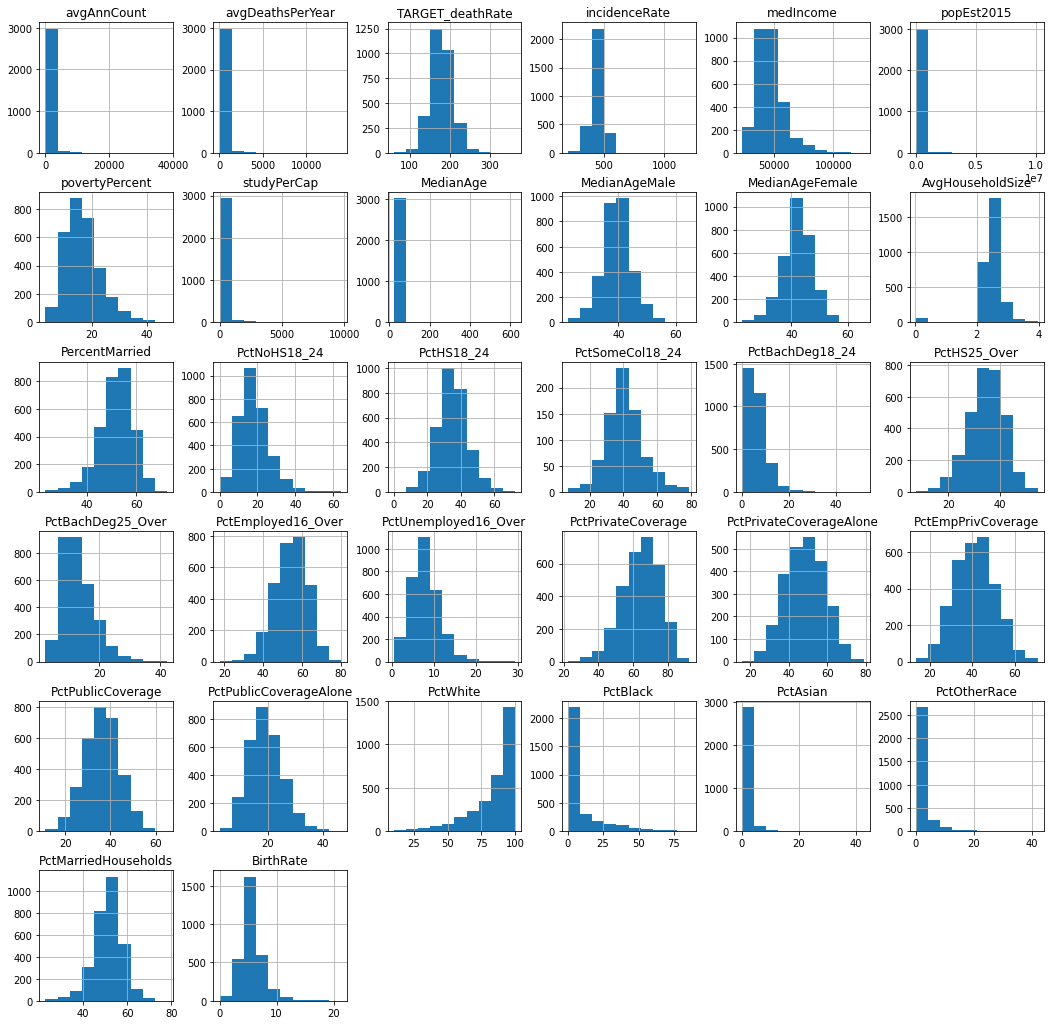

In [3]:
hist = df.hist(figsize=(18,18))

In [4]:
df[ (df.MedianAge>=100) | (df.MedianAge<=0) ]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
100,89.000000,32,152.3,447.200000,61802,17110,8.2,0.000000,"(61494.5, 125635]",458.4,...,67.6,55.0,24.3,9.0,96.476056,0.352983,0.482410,1.194258,60.491493,9.675646
181,564.000000,188,135.7,395.400000,56142,139394,12.6,0.000000,"(54545.6, 61494.5]",469.2,...,NaN,43.1,35.9,21.1,69.971750,2.662510,1.383949,9.734481,51.876656,5.497053
225,346.000000,156,176.8,399.000000,44207,62194,14.6,0.000000,"(42724.4, 45201]",546.0,...,NaN,42.6,36.2,18.6,74.844730,21.417651,0.342389,1.576584,51.591360,4.194566
318,186.000000,93,193.4,406.200000,37122,25345,19.0,0.000000,"(34218.1, 37413.8]",624.0,...,34.2,29.4,53.2,23.4,96.145821,0.625960,0.519665,0.141727,48.108966,4.012841
425,230.000000,98,198.1,477.800000,45841,39259,18.7,0.000000,"(45201, 48021.6]",508.8,...,45.4,37.9,39.3,22.3,68.766237,27.377617,0.430442,1.533289,45.407268,6.140351
606,35.000000,12,188.8,538.800000,36449,4251,17.3,0.000000,"(34218.1, 37413.8]",619.2,...,24.7,20.2,53.8,27.1,98.442662,0.070788,0.165172,0.141576,46.769034,3.333333
637,140.000000,59,193.1,478.000000,66522,25512,6.9,0.000000,"(61494.5, 125635]",498.0,...,65.6,55.4,24.4,9.3,96.813880,0.954259,0.563880,0.339117,61.336613,7.938903
843,599.000000,250,207.1,489.900000,39927,128755,22.5,62.133509,"(37413.8, 40362.7]",412.8,...,41.4,36.4,38.7,23.6,67.091150,29.715665,0.765822,0.362590,45.456544,3.432793
991,85.000000,32,156.5,404.000000,61762,19162,9.6,0.000000,"(61494.5, 125635]",481.2,...,NaN,50.3,26.1,13.8,88.446510,6.584645,1.240891,1.019115,58.641541,3.450672
1199,959.000000,398,206.7,497.400000,41010,201410,18.8,24.824984,"(40362.7, 42724.4]",424.8,...,42.2,32.6,35.9,20.2,69.410704,23.273279,3.041250,1.080156,41.830737,5.131499


In [6]:
 df.isna().mean()*100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P